# AirBnB Toronto Data

In this notebook we will explore AirBnB's listings data in Toronto.

We will start with importing some visualization libraries and the library file containing the code which acommpanies this demo notebook.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import lib as airbnb
import numpy as np

%matplotlib inline

data = airbnb.load_data(path='./data/toronto-listings-2018-10.csv')
summary_data = airbnb.load_data(path='./data/toronto-listings-summary-2018-10.csv')

print("Data Shape:", data.shape)

summary_data.head()

Data Shape: (17343, 95)


/home/fizzler/anaconda3/envs/dsnd/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (88) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17
id,,,,,,,,,,,,,,,,,
1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.6461676615568,-79.4245101278309,Entire home/apt,469,4,7,2017-12-04,0.18,1,0.0,NaN,NaN
8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.6410512698272,-79.3762770057779,Private room,97,180,170,2013-08-27,1.53,2,365.0,NaN,NaN
10314,Union Inn II (Leslieville),35505,Douglas & Annie,NaN,South Riverdale,43.6701855037018,-79.3358478358527,Private room,69,1,77,2016-08-18,0.7,1,355.0,NaN,NaN
12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.6672406861034,-79.4159775610911,Private room,65,1,0,NaN,NaN,1,0.0,NaN,NaN
23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.6960167412772,-79.4546827470826,Private room,70,1,201,2018-07-02,1.98,2,346.0,NaN,NaN


## Look At The Data

Let's have a look at the data available in the dataset.

Here are the steps we'll follow for inspecting the data:

1. We'll view what features are available in the dataset
2. We'll check missing values in each column
3. We'll drop some columns and move forward with the rest
4. We'll define a list of categorical columns

In [2]:
# Inspecting the columns
data.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedr

In [3]:
# Some of the columns with valuable data (i.e. data that can give us answers to our questions)
keep_cols = [
    "price", "neighbourhood_cleansed", "room_type", "bedrooms", "bed_type", "maximum_nights", "beds", 
    "property_type", "amenities", "number_of_reviews", "minimum_nights",
    "cleaning_fee", "instant_bookable",
    "review_scores_rating", "reviews_per_month", "require_guest_phone_verification", "host_is_superhost",
    "host_response_rate"
]

# Define the categorical columns which will need dummy vars before modeling
cat_cols = ['property_type', 'bed_type', 'neighbourhood_cleansed', 'room_type']

data = data[keep_cols]

# columns with more than 15% missing data
cols_missing_some_data_15 = set(data.columns[data.isnull().mean() > 0.15])

# columns with more than 25% missing data
cols_missing_some_data_25 = set(data.columns[data.isnull().mean() > 0.25])

# columns with more than 50% missing data
cols_missing_lots_data = set(data.columns[data.isnull().mean() > 0.50])

print("Missing more than 15%", cols_missing_some_data_15)
print("Missing more than 25%", cols_missing_some_data_25)
print("Missing more than 50%", cols_missing_lots_data)

Missing more than 15% {'host_response_rate', 'review_scores_rating', 'reviews_per_month', 'cleaning_fee'}
Missing more than 25% {'host_response_rate'}
Missing more than 50% set()


In [4]:
# Show a sample of the new df with less features
data.sample(25)

,price,neighbourhood_cleansed,room_type,bedrooms,bed_type,maximum_nights,beds,property_type,amenities,number_of_reviews,minimum_nights,cleaning_fee,instant_bookable,review_scores_rating,reviews_per_month,require_guest_phone_verification,host_is_superhost,host_response_rate
id,,,,,,,,,,,,,,,,,,
22126250,$180.00,Waterfront Communities-The Island,Entire home/apt,1.0,Real Bed,6,1.0,Condominium,"{TV,Wifi,Pool,Kitchen,Gym,Elevator,""Hot tub"",H...",0,2,NaN,f,NaN,NaN,f,f,NaN
25874464,$66.00,Roncesvalles,Private room,1.0,Real Bed,1125,1.0,Apartment,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",5,2,$30.00,f,100.0,1.65,f,f,100%
27082627,$50.00,Little Portugal,Private room,1.0,Real Bed,1125,1.0,House,"{Wifi,""Air conditioning"",Kitchen,""Paid parking...",8,2,$20.00,f,100.0,4.07,t,f,100%
27403604,$91.00,Runnymede-Bloor West Village,Private room,1.0,Real Bed,7,1.0,House,"{Wifi,Kitchen,Heating,""Smoke detector"",""Carbon...",1,2,$0.00,f,100.0,0.50,f,f,100%
5999578,$65.00,Regent Park,Private room,1.0,Real Bed,7,1.0,Townhouse,"{TV,Wifi,""Air conditioning"",""Pets live on this...",138,1,$20.00,f,97.0,3.60,f,t,100%
23358596,$180.00,Waterfront Communities-The Island,Entire home/apt,3.0,Real Bed,100,3.0,Condominium,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",14,2,$40.00,f,97.0,2.12,f,f,100%
4057435,$91.00,University,Private room,1.0,Real Bed,10,1.0,House,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",14,2,$20.00,f,98.0,0.28,f,f,NaN
12757033,$164.00,Little Portugal,Entire home/apt,3.0,Real Bed,12,3.0,House,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0,4,NaN,f,NaN,NaN,f,f,NaN
9423034,$40.00,Dovercourt-Wallace Emerson-Junction,Private room,2.0,Real Bed,14,2.0,House,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",258,2,$0.00,f,95.0,7.36,f,f,NaN


## Cleaning The Data

The next important step is to clean the data in order for us to be able to derive to statistical information from it with models.

Here are the steps taken when cleaning the data:
1. Convert numerical columns which are currently in string formations (ex: price, cleaning_fee)
2. Convert categorical columns into multiple columns of 0 and 1 signals. We do this to turn our categorical data into numeric signals which are procossed by our statistical models. 
3. Remove outliers (listings priced more than 3x standard deviation)
4. Fill missing values with the mean

In [ ]:
df = airbnb.clean(data, cat_cols=cat_cols)
df.describe()

,price,bedrooms,maximum_nights,beds,number_of_reviews,minimum_nights,cleaning_fee,instant_bookable,review_scores_rating,reviews_per_month,...,neighbourhood_cleansed_Woburn,neighbourhood_cleansed_Woodbine Corridor,neighbourhood_cleansed_Woodbine-Lumsden,neighbourhood_cleansed_Wychwood,neighbourhood_cleansed_Yonge-Eglinton,neighbourhood_cleansed_Yonge-St.Clair,neighbourhood_cleansed_York University Heights,neighbourhood_cleansed_Yorkdale-Glen Park,room_type_Private room,room_type_Shared room
count,17189.000000,17189.000000,1.718900e+04,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,...,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.00000,17189.000000,17189.000000
mean,131.435395,1.294898,1.846134e+05,1.651386,24.603991,6.262144,56.735520,0.342137,94.312566,2.036910,...,0.002443,0.005410,0.002502,0.006050,0.005876,0.004189,0.008436,0.00512,0.335040,0.017628
std,100.731593,0.840011,1.806824e+07,1.058300,42.170835,28.103799,39.981739,0.474439,7.026060,2.014011,...,0.049372,0.073359,0.049955,0.077551,0.076431,0.064587,0.091460,0.07137,0.472018,0.131597
min,0.000000,0.000000,1.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,65.000000,1.000000,3.100000e+01,1.000000,2.000000,1.000000,30.000000,0.000000,93.000000,0.540000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,100.000000,1.000000,1.125000e+03,1.000000,8.000000,2.000000,56.735520,0.000000,95.000000,1.740000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,160.000000,2.000000,1.125000e+03,2.000000,28.000000,3.000000,70.000000,1.000000,99.000000,2.540000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
max,727.000000,30.000000,2.147484e+09,30.000000,620.000000,1125.000000,879.000000,1.000000,100.000000,16.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Visualizationing The Data

Let's visualize some of the potential trends in the data after cleaning it.

### Correlation Matrix

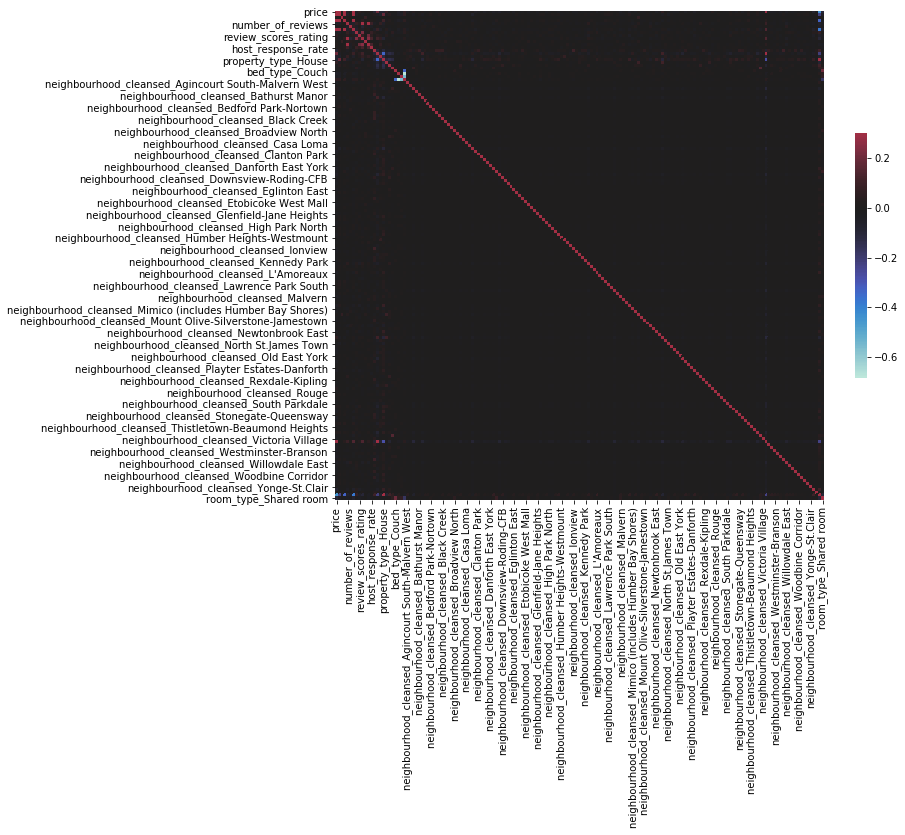

In [ ]:
def condition(c):
    return c not in ['longitude', 'latitude'] and \
    'amenities' not in c

corr = df[[c for c in df.columns if condition(c)]].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.3, center=0, square=True, cbar_kws={"shrink": .5}, ax=ax)

### Price Distribution

/home/fizzler/anaconda3/envs/dsnd/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


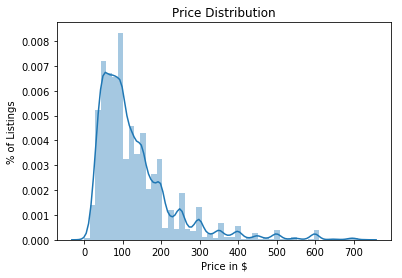

In [ ]:
ax = sns.distplot(df.price)
ax.set(xlabel='Price in $', ylabel='% of Listings')
plt.title('Price Distribution')
plt.show()

### Answering Questions

#### Neighbourhoods with Highest Listing Prices & Highest Price per Bed

In [ ]:
clean_df = airbnb.clean(data, include_dummies=False)

# assume 1 bed if the place has 0 beds (e.g. sofa bed)
clean_df['beds'] = clean_df['beds'].mask(clean_df['beds'] == 0, 1)
clean_df['price_per_bed'] = clean_df.price / clean_df.beds

grouped_by_hood = clean_df.groupby('neighbourhood_cleansed')
hood_mean = grouped_by_hood.mean()[['price', 'price_per_bed']]

In [ ]:
# Neighbourhood with highest rates
display(hood_mean.sort_values(by=['price'], ascending=False).head(5).round(2))
display(hood_mean.sort_values(by=['price_per_bed'], ascending=False).head(5).round(2))

,price,price_per_bed
neighbourhood_cleansed,,
Waterfront Communities-The Island,191.83,124.82
Rosedale-Moore Park,174.61,117.98
Lawrence Park South,168.72,79.51
Bridle Path-Sunnybrook-York Mills,166.33,114.02
Lawrence Park North,164.93,68.55


,price,price_per_bed
neighbourhood_cleansed,,
Waterfront Communities-The Island,191.83,124.82
Rosedale-Moore Park,174.61,117.98
Niagara,158.23,114.29
Bridle Path-Sunnybrook-York Mills,166.33,114.02
Bay Street Corridor,147.45,107.66


### Training & Testing The Model

In [ ]:
from tpot import TPOTRegressor

model = TPOTRegressor(scoring='r2', verbosity=2)

test_score, train_score, val_score, X_train, X_test, X_val, y_train, y_test, y_val, test_preds, val_preds = \
    airbnb.train_test(df, model, dummy_na=False)

model.export('tpot_exported_pipeline.py')

print("Training score:", train_score)
print("Validation score:", val_score)
print("Testing score:", test_scote)